In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
DATA_PATH = "/content/drive/MyDrive/Dataton/data/"
DATA_PATH

'/content/drive/MyDrive/Dataton/data/'

In [10]:
SEED = 42

In [11]:
import pandas as pd
import numpy as np

train_ft = pd.read_csv(f"{DATA_PATH}train_preprocessing.csv")
target = pd.read_csv(f"{DATA_PATH}target.csv")

train_ft.shape, target.shape

((103904, 60), (103904, 1))

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## 군집 분석
https://lecture.lks.kr/lecture/code-view/?file_name=52169f1a749c24699652b33ff10bd25c4e7d9a7c593f09e28a150e706ee36360.html

In [13]:
import matplotlib.pyplot as plt

In [14]:
sse_list = []
for k in range(2,20):
    cluster = KMeans(k, random_state=SEED)
    cluster.fit(train_ft)
    sse_list.append(cluster.inertia_)

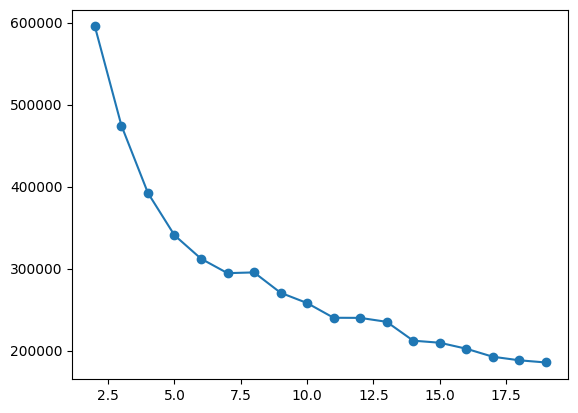

In [15]:
fig, ax = plt.subplots()
ax.plot(range(2,20), sse_list, marker="o")
plt.show()

### KMeans

In [16]:
target.nunique()

,0
만족도,2


In [17]:
cluster = KMeans(8, random_state=SEED, init='random')
cluster.fit(train_ft) # 학습

KMeans(init='random', random_state=42)

In [18]:
cluster.labels_

array([5, 7, 1, ..., 7, 6, 2], dtype=int32)

In [19]:
silhouette_score(train_ft, cluster.labels_)

0.3424359273070929

In [20]:
# from yellowbrick.cluster import KElbowVisualizer

# # 클러스터 객체, k 파라미터에 k 범위를 전달해주면 됨.
# viz = KElbowVisualizer( cluster, k=(2,20) )
# viz.fit(train_ft)
# viz.show()
# plt.show()

In [21]:
train_ft["cluster"] = cluster.labels_
train_ft.head()

,나이,비행거리,기내와이파이,시간편리성,온라인 예약편의성,탑승구 위치,기내식,온라인 탑승수속,좌석편안함,기내엔터테인먼트,...,여행유형_좌석등급_출장_이코노미,여행유형_좌석등급_출장_이코노미 플러스,연령대_10대,연령대_10대이하,연령대_20대,연령대_30대,연령대_40대,연령대_50대,연령대_60대이상,cluster
0,0.076923,0.086632,0.6,0.8,0.6,0.2,1.0,0.6,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.230769,0.041195,0.6,0.4,0.6,0.6,0.2,0.6,0.2,0.2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7
2,0.243590,0.224354,0.4,0.4,0.4,0.4,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
3,0.230769,0.107229,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
4,0.692308,0.036955,0.6,0.6,0.6,0.6,0.8,1.0,1.0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2


In [22]:
train_ft["cluster"].value_counts()

,count
cluster,
2,20116
1,20047
0,16176
5,16044
6,10207
7,8639
3,6378
4,6297


In [23]:
import matplotlib
from matplotlib import font_manager

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv

fontpaths = ["/usr/share/fonts/truetype/nanum/"]
font_files = font_manager.findSystemFonts(fontpaths=fontpaths)

for ff in font_files:
    font_manager.fontManager.addfont(ff)

matplotlib.rc('font', family="NanumGothic")
matplotlib.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,412 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123634 files and dire

In [24]:
import seaborn as sns

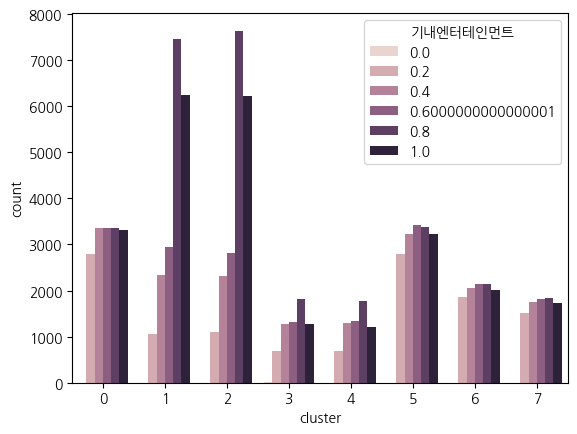

In [25]:
sns.countplot(train_ft, x="cluster", hue="기내엔터테인먼트")
plt.show()

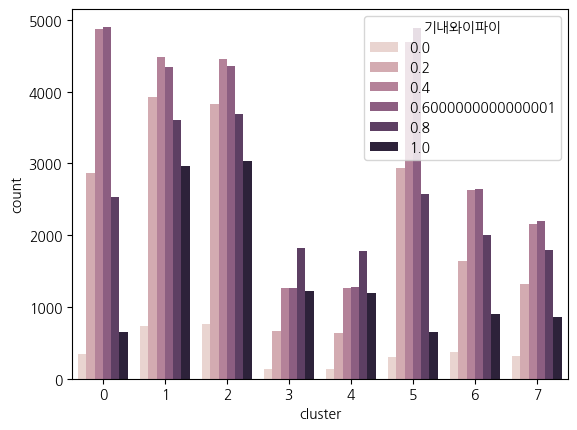

In [27]:
sns.countplot(train_ft, x="cluster", hue="기내와이파이")
plt.show()

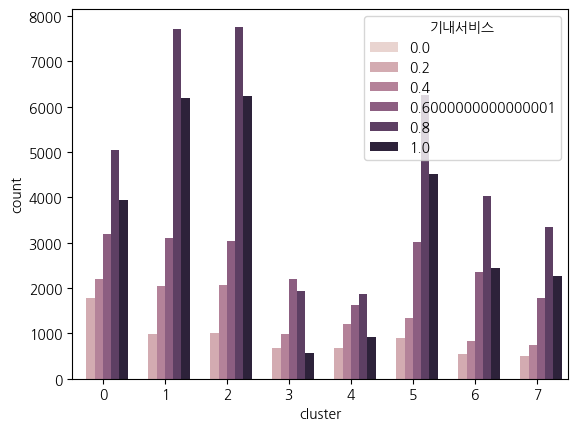

In [28]:
sns.countplot(train_ft, x="cluster", hue="기내서비스")
plt.show()

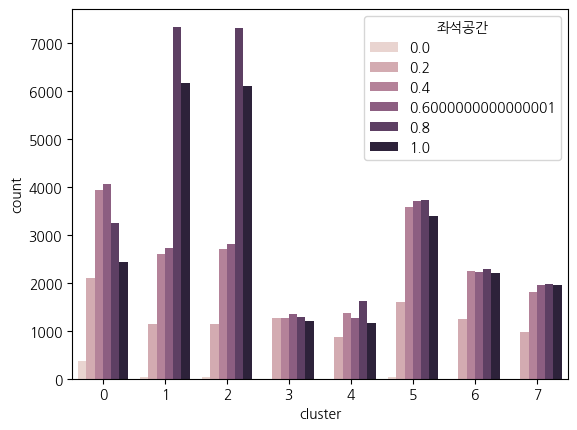

In [29]:
sns.countplot(train_ft, x="cluster", hue="좌석공간")
plt.show()

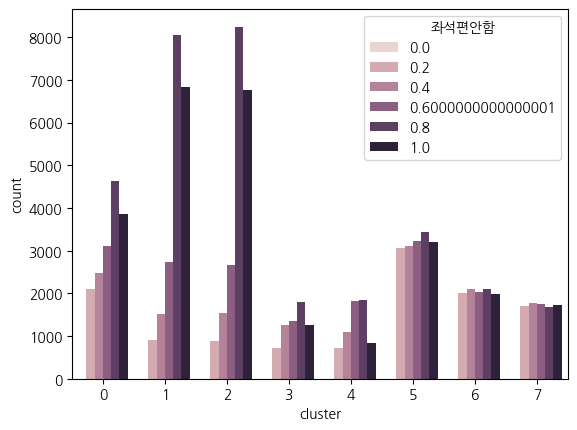

In [31]:
sns.countplot(train_ft, x="cluster", hue="좌석편안함")
plt.show()

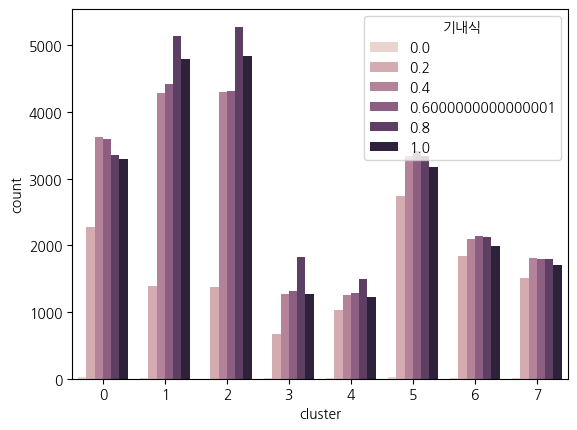

In [34]:
sns.countplot(train_ft, x="cluster", hue="기내식")
plt.show()

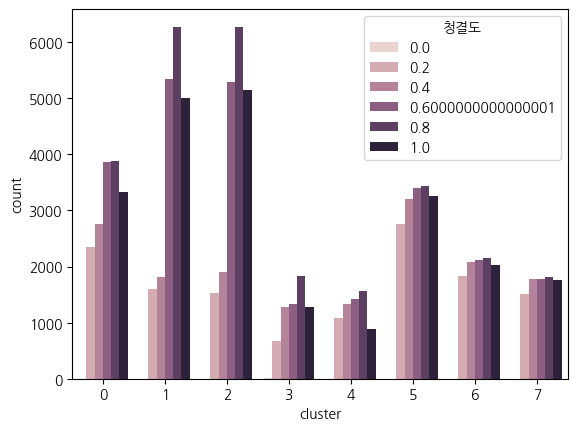

In [36]:
sns.countplot(train_ft, x="cluster", hue="청결도")
plt.show()

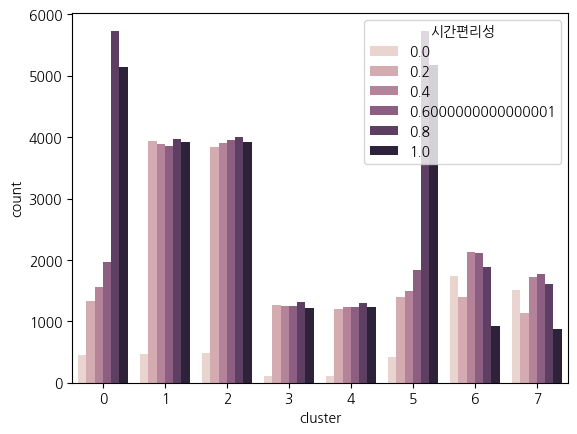

In [32]:
sns.countplot(train_ft, x="cluster", hue="시간편리성")
plt.show()

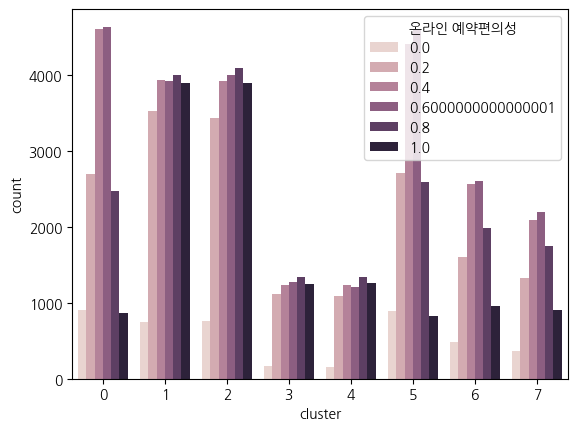

In [33]:
sns.countplot(train_ft, x="cluster", hue="온라인 예약편의성")
plt.show()

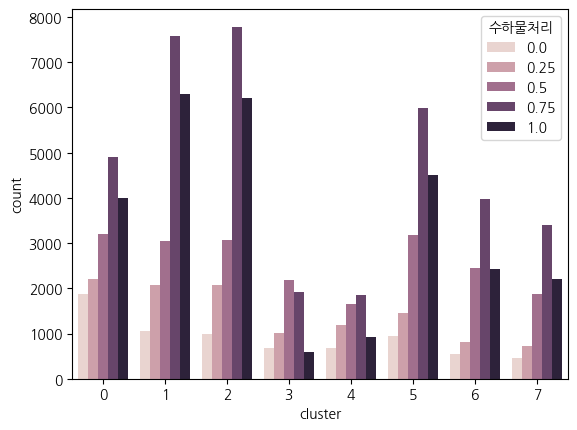

In [35]:
sns.countplot(train_ft, x="cluster", hue="수하물처리")
plt.show()

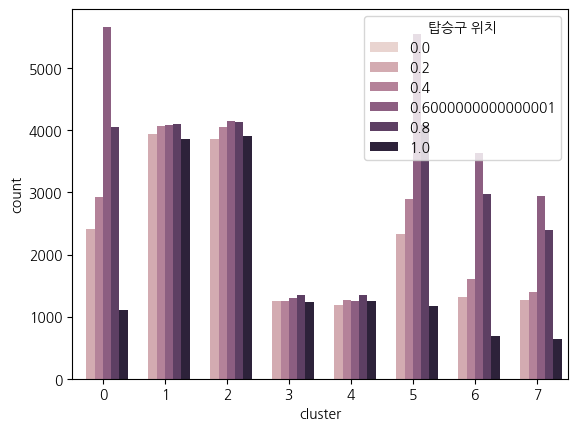

In [37]:
sns.countplot(train_ft, x="cluster", hue="탑승구 위치")
plt.show()

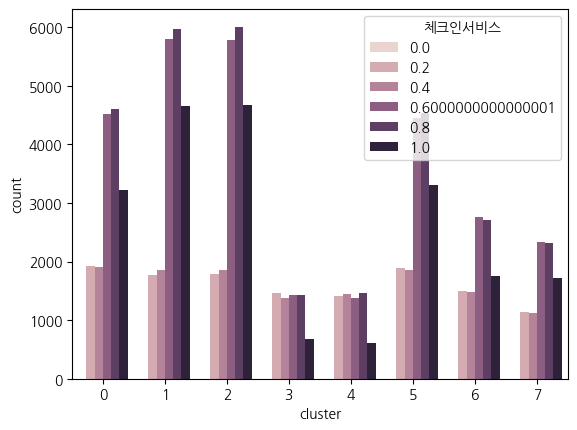

In [38]:
sns.countplot(train_ft, x="cluster", hue="체크인서비스")
plt.show()

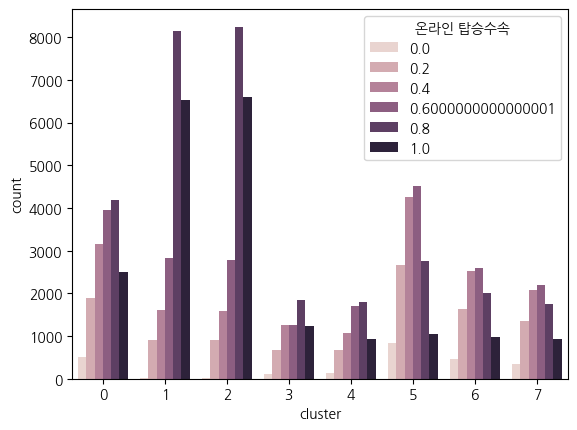

In [39]:
sns.countplot(train_ft, x="cluster", hue="온라인 탑승수속")
plt.show()

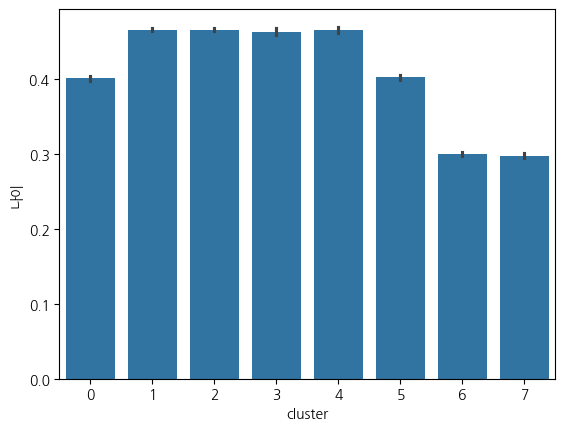

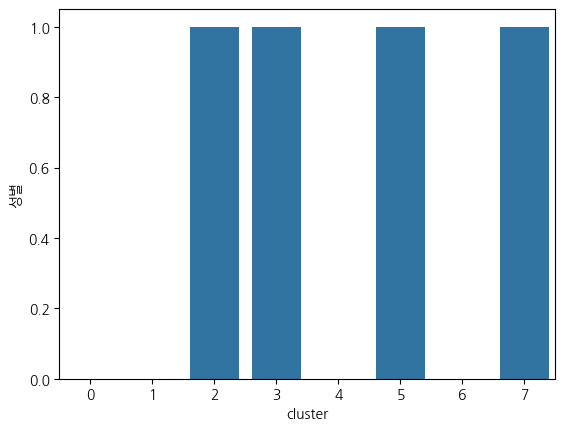

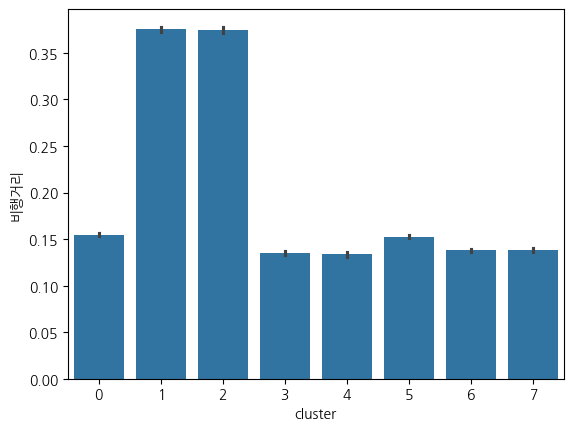

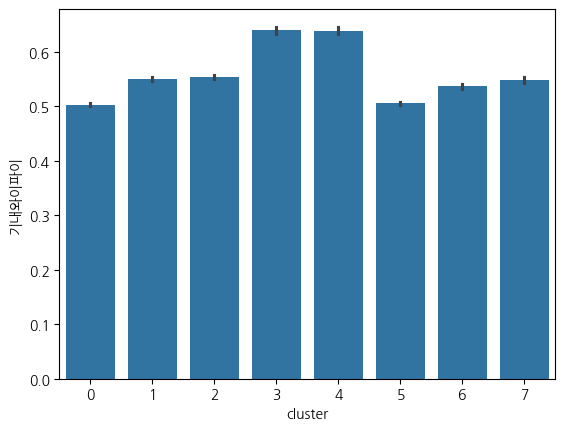

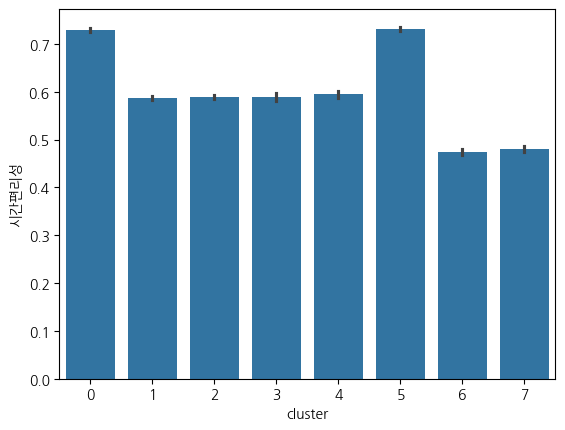

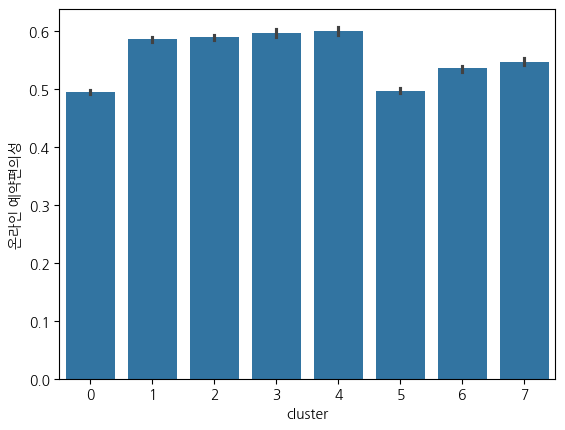

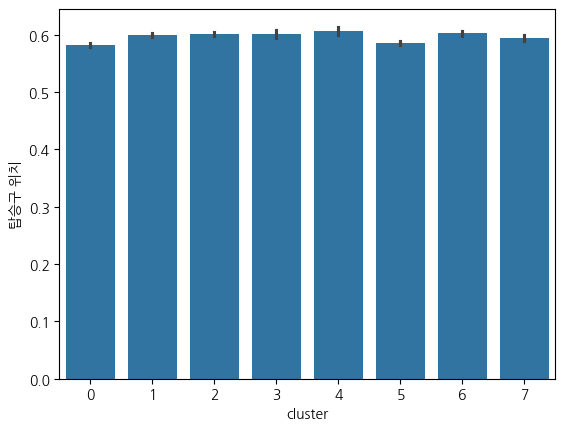

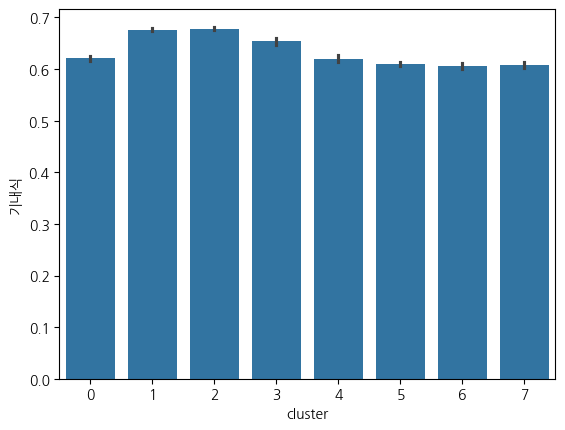

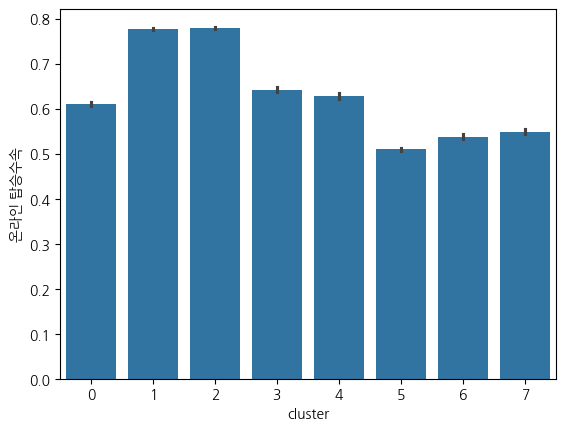

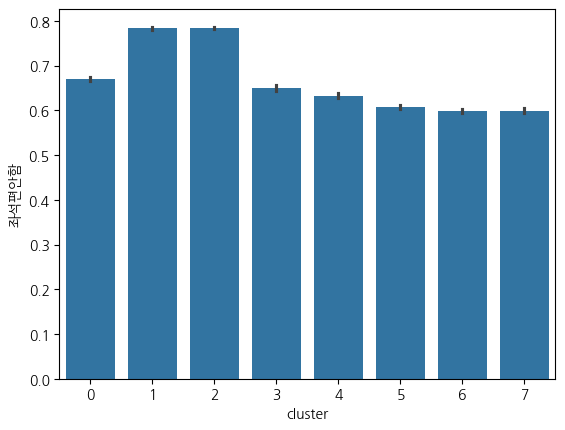

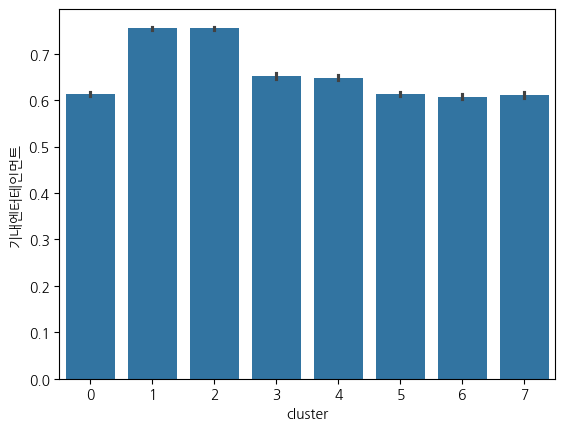

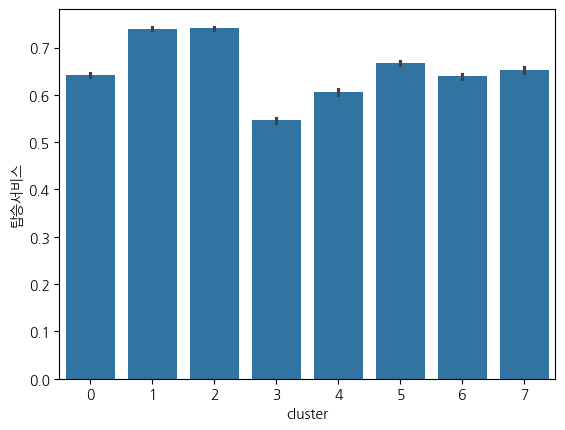

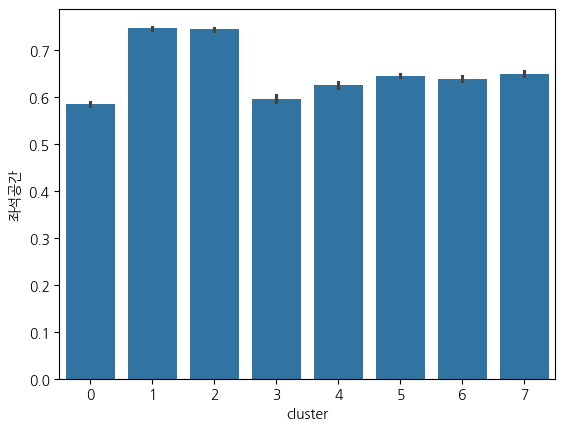

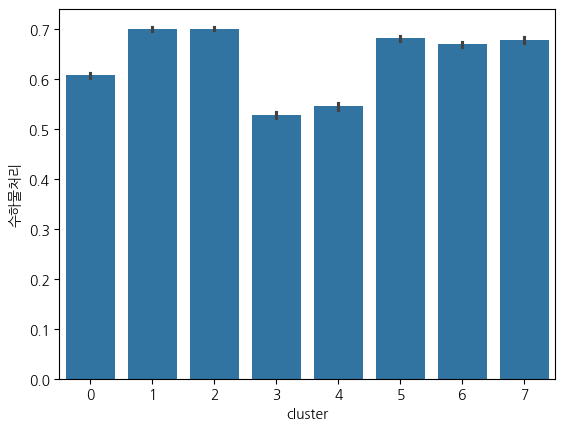

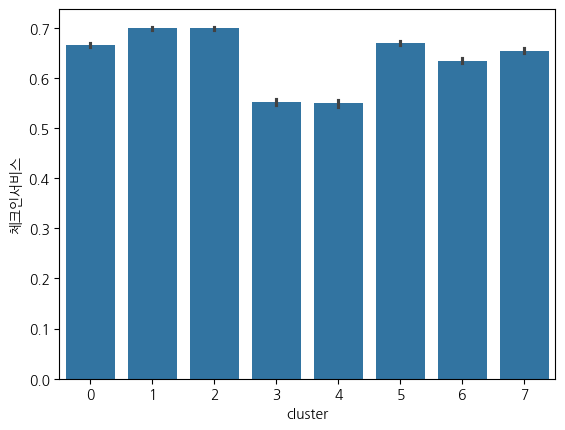

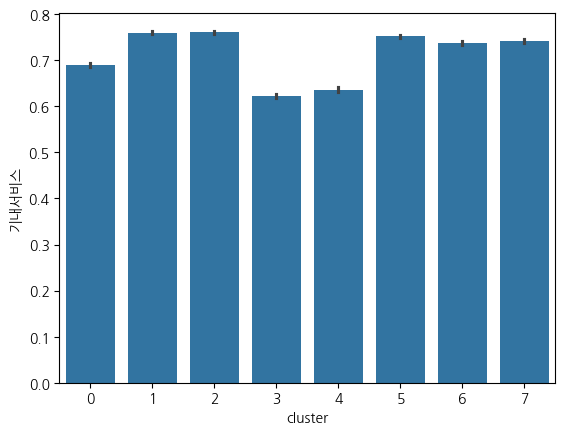

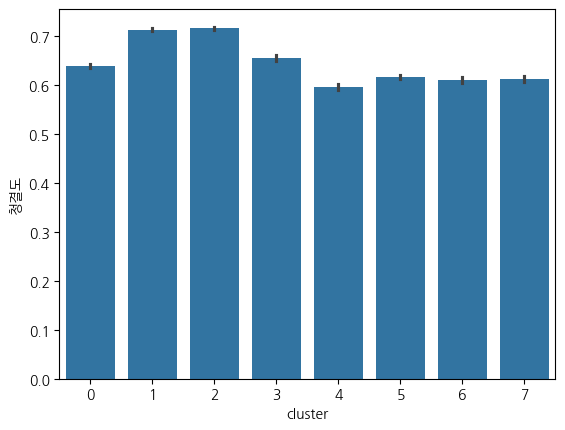

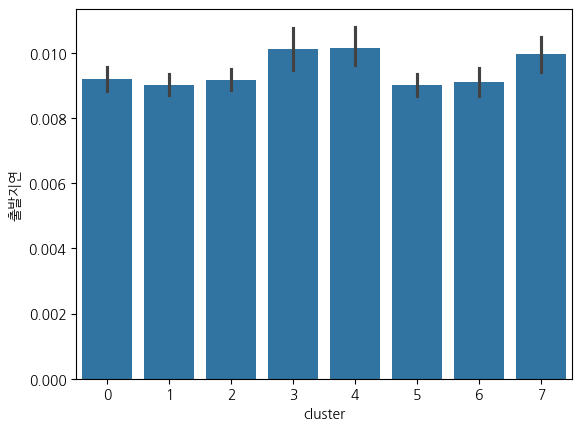

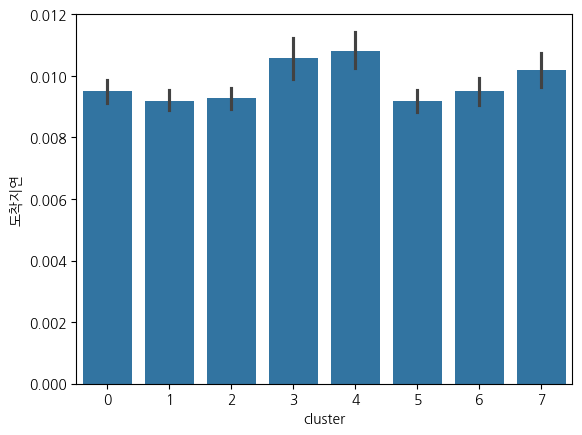

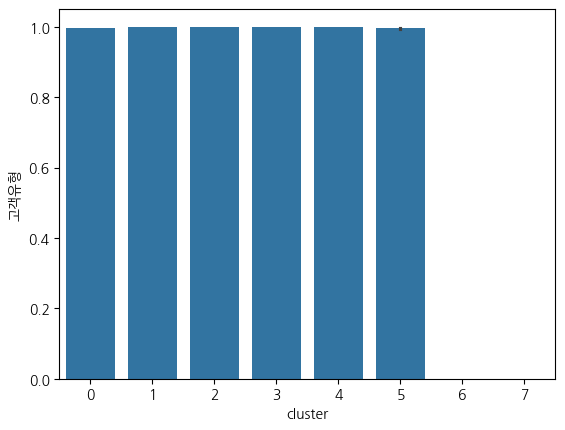

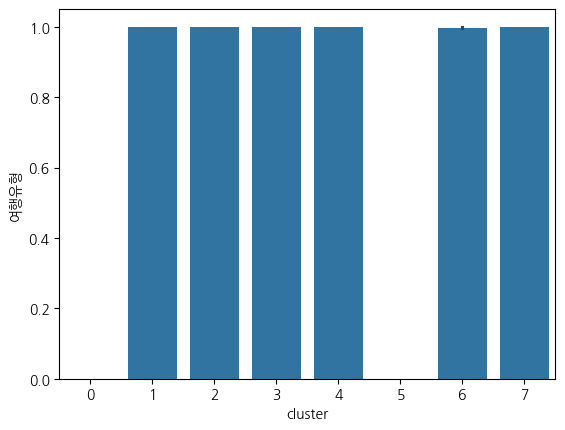

In [40]:
cols_num = ["나이", '성별', "비행거리", "기내와이파이", "시간편리성", "온라인 예약편의성", "탑승구 위치", '기내식', '온라인 탑승수속', '좌석편안함',
            '기내엔터테인먼트', '탑승서비스', '좌석공간', '수하물처리', '체크인서비스', '기내서비스', '청결도', '출발지연', '도착지연', '고객유형',
            '여행유형']

for col in cols_num:
    sns.barplot(train_ft, x="cluster", y=col)
    plt.show()
    print()

<ipython-input-41-4e6e1566cf40>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(train_ft, x="cluster", y=col, ci='sd')


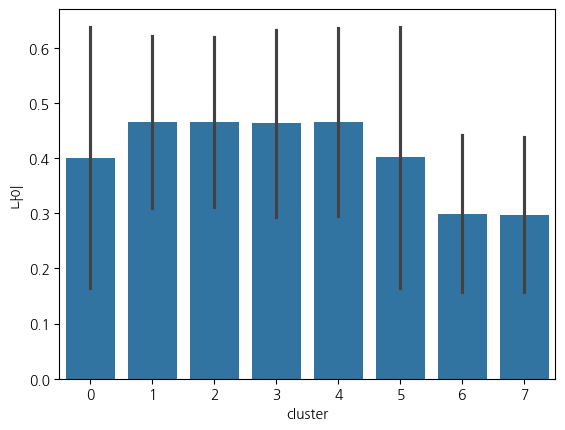

<ipython-input-41-4e6e1566cf40>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(train_ft, x="cluster", y=col, ci='sd')


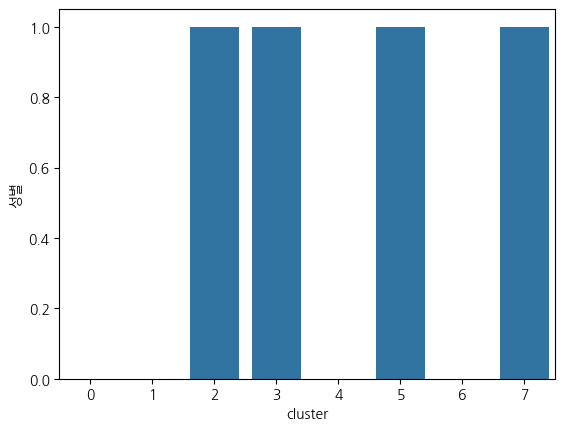

<ipython-input-41-4e6e1566cf40>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(train_ft, x="cluster", y=col, ci='sd')


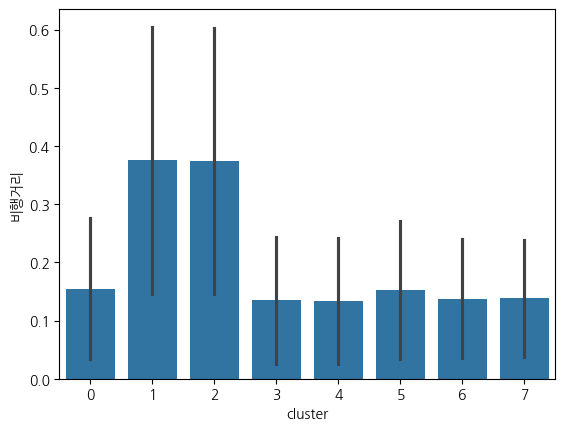

<ipython-input-41-4e6e1566cf40>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(train_ft, x="cluster", y=col, ci='sd')


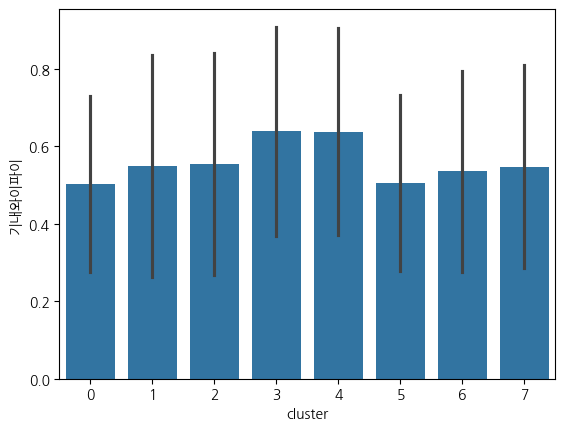

<ipython-input-41-4e6e1566cf40>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(train_ft, x="cluster", y=col, ci='sd')


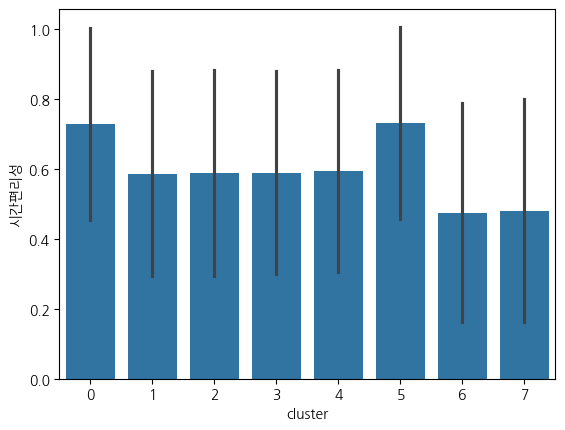

<ipython-input-41-4e6e1566cf40>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(train_ft, x="cluster", y=col, ci='sd')


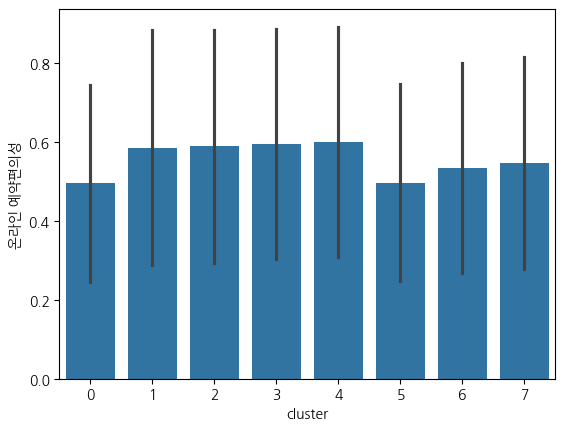

<ipython-input-41-4e6e1566cf40>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(train_ft, x="cluster", y=col, ci='sd')


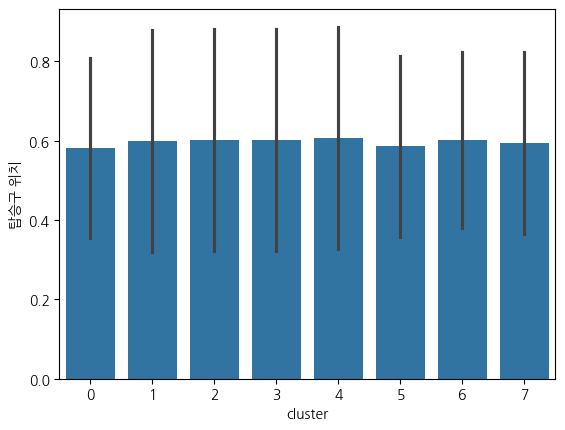

<ipython-input-41-4e6e1566cf40>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(train_ft, x="cluster", y=col, ci='sd')


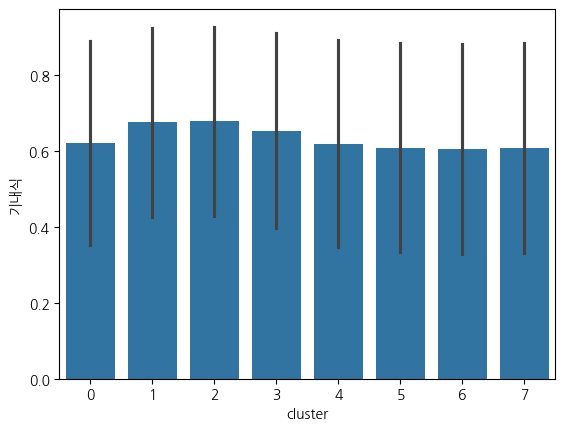

<ipython-input-41-4e6e1566cf40>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(train_ft, x="cluster", y=col, ci='sd')


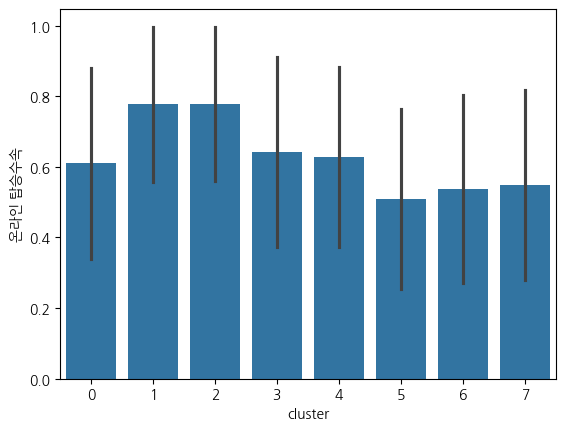

<ipython-input-41-4e6e1566cf40>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(train_ft, x="cluster", y=col, ci='sd')


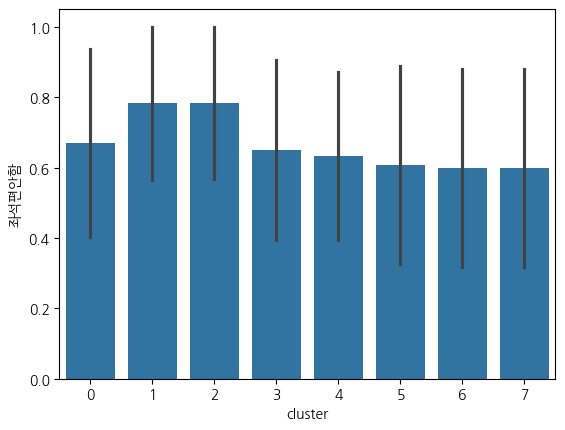

<ipython-input-41-4e6e1566cf40>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(train_ft, x="cluster", y=col, ci='sd')


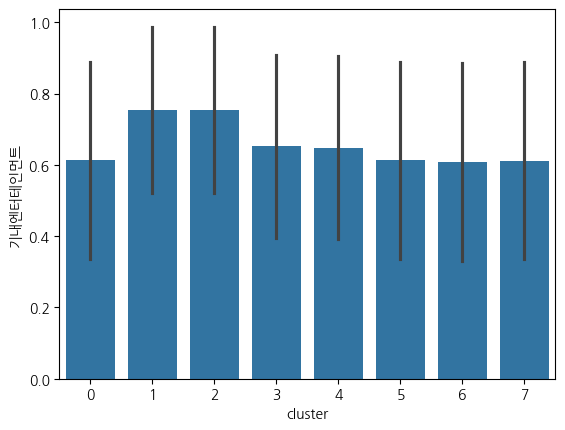

<ipython-input-41-4e6e1566cf40>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(train_ft, x="cluster", y=col, ci='sd')


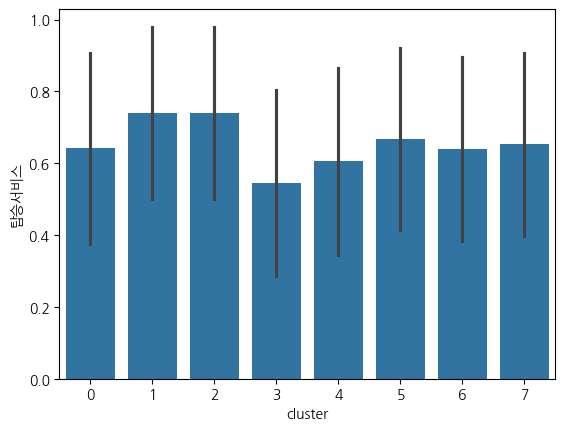

<ipython-input-41-4e6e1566cf40>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(train_ft, x="cluster", y=col, ci='sd')


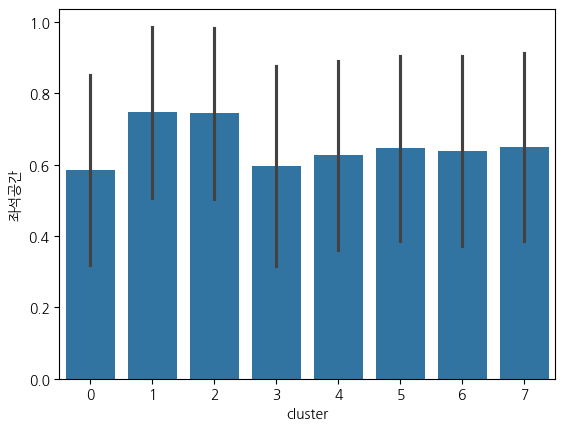

<ipython-input-41-4e6e1566cf40>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(train_ft, x="cluster", y=col, ci='sd')


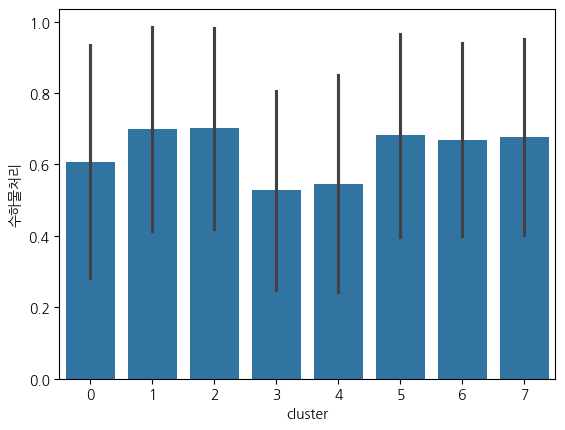

<ipython-input-41-4e6e1566cf40>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(train_ft, x="cluster", y=col, ci='sd')


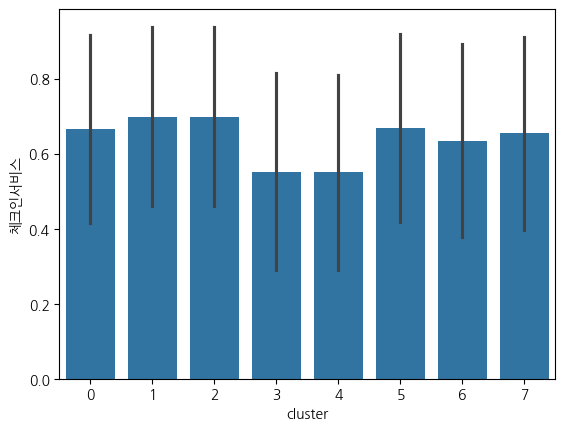

<ipython-input-41-4e6e1566cf40>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(train_ft, x="cluster", y=col, ci='sd')


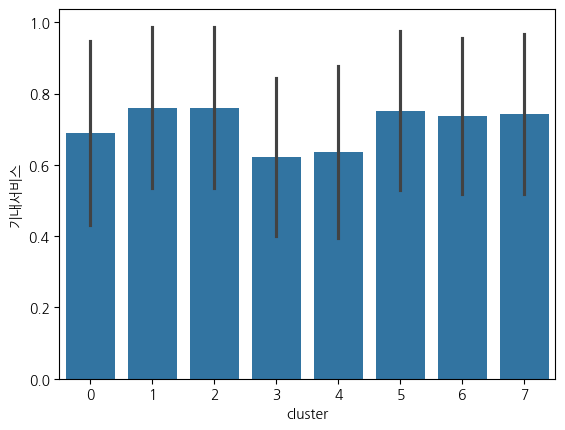

<ipython-input-41-4e6e1566cf40>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(train_ft, x="cluster", y=col, ci='sd')


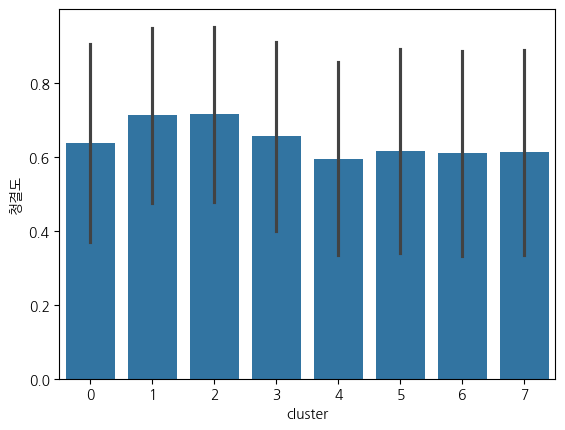

<ipython-input-41-4e6e1566cf40>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(train_ft, x="cluster", y=col, ci='sd')


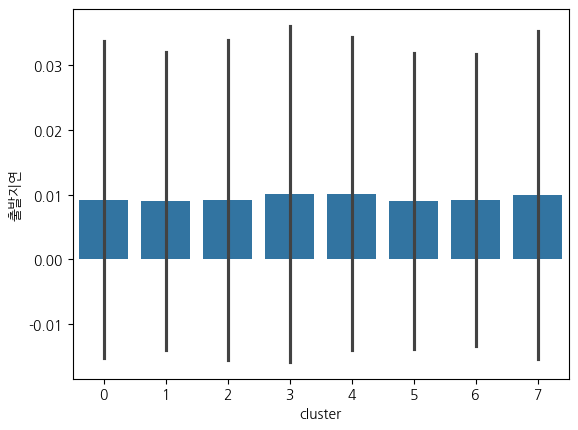

<ipython-input-41-4e6e1566cf40>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(train_ft, x="cluster", y=col, ci='sd')


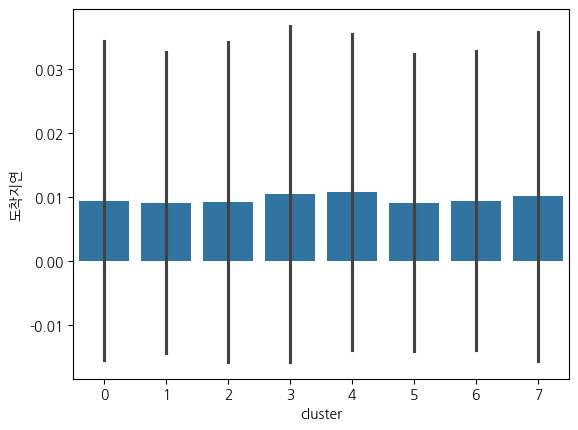

<ipython-input-41-4e6e1566cf40>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(train_ft, x="cluster", y=col, ci='sd')


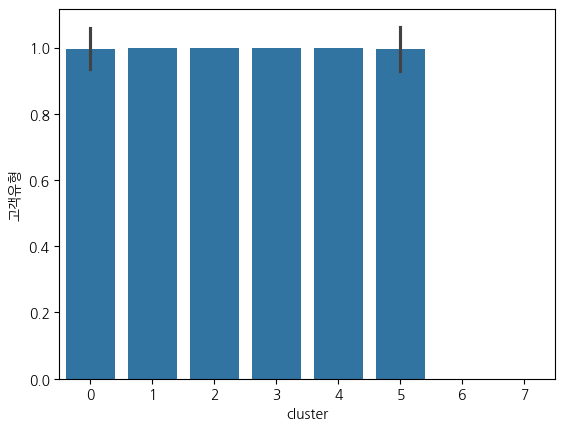

<ipython-input-41-4e6e1566cf40>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(train_ft, x="cluster", y=col, ci='sd')


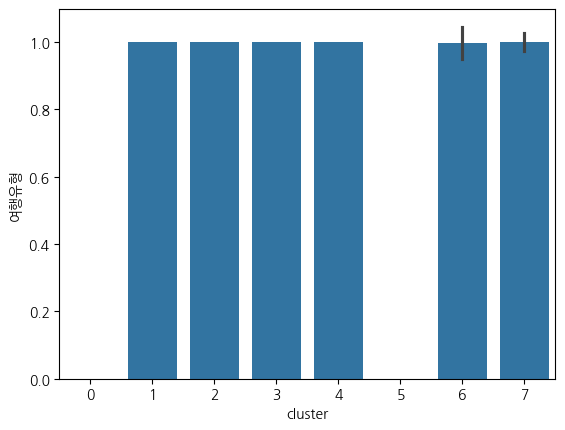

In [41]:
cols_num = ["나이", '성별', "비행거리", "기내와이파이", "시간편리성", "온라인 예약편의성", "탑승구 위치", '기내식', '온라인 탑승수속', '좌석편안함',
            '기내엔터테인먼트', '탑승서비스', '좌석공간', '수하물처리', '체크인서비스', '기내서비스', '청결도', '출발지연', '도착지연', '고객유형',
            '여행유형']

for col in cols_num:
    sns.barplot(train_ft, x="cluster", y=col, ci='sd')  # ci='sd': 표준편차
    plt.show()
    print()

In [26]:
train_ft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 61 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   나이                        103904 non-null  float64
 1   비행거리                      103904 non-null  float64
 2   기내와이파이                    103904 non-null  float64
 3   시간편리성                     103904 non-null  float64
 4   온라인 예약편의성                 103904 non-null  float64
 5   탑승구 위치                    103904 non-null  float64
 6   기내식                       103904 non-null  float64
 7   온라인 탑승수속                  103904 non-null  float64
 8   좌석편안함                     103904 non-null  float64
 9   기내엔터테인먼트                  103904 non-null  float64
 10  탑승서비스                     103904 non-null  float64
 11  좌석공간                      103904 non-null  float64
 12  수하물처리                     103904 non-null  float64
 13  체크인서비스                    103904 non-null  f